# Customizing Plot Legends
Plot legends give meaning to a visualization, assigning labels to the various plot elements. The simplest legend can be created with the <b>plt.legend()</b> command, which automatically
creates a legend for any labeled plot elements

In [1]:
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('classic')

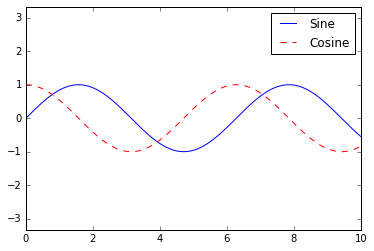

In [2]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

But there are many ways we might want to customize such a legend. For example, we
can specify the location and turn off the frame

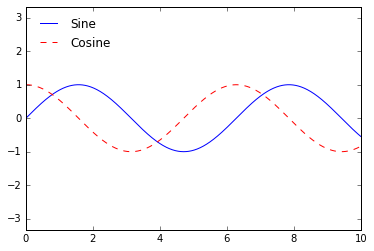

In [3]:
ax.legend(loc='upper left', frameon=False)
fig

We can use the <b>ncol</b> command to specify the number of columns in the legend

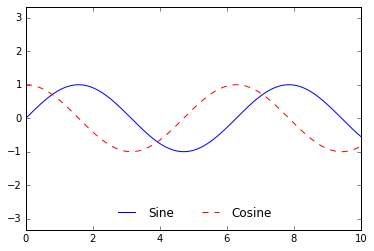

In [4]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

We can use a rounded box (<b>fancybox</b>) or add a shadow, change the transparency
(<b>alpha</b> value) of the frame, or change the padding around the text

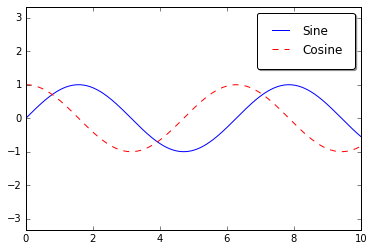

In [5]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

## Choosing Elements for the Legend
As we’ve already seen, the legend includes all labeled elements by default. If this is not
what is desired, we can fine-tune which elements and labels appear in the legend by
using the objects returned by plot commands. The<b> plt.plot()</b> command is able to
create multiple lines at once, and returns a list of created line instances. Passing any of
these to <b>plt.legend()</b> will tell it which to identify, along with the labels we’d like to
specify

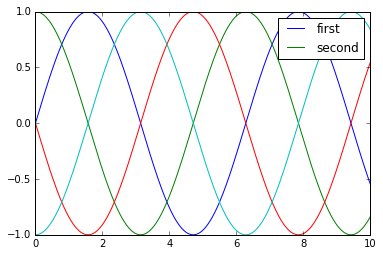

In [6]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

I generally find in practice that it is clearer to use the first method, applying labels to
the plot elements you’d like to show on the legend

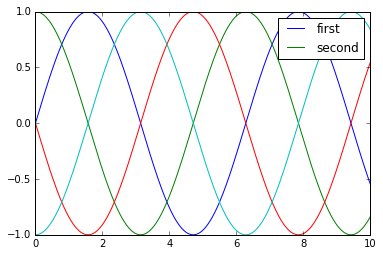

In [7]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

Notice that by default, the legend ignores all elements without a<b> label</b> attribute set.

## Multiple Legends
Sometimes when designing a plot you’d like to add multiple legends to the same axes.
Unfortunately, Matplotlib does not make this easy: via the standard legend interface,
it is only possible to create a single legend for the entire plot. If you try to create a
second legend using<b> plt.legend() </b>or<b> ax.legend()</b>, it will simply override the first
one. We can work around this by creating a new legend artist from scratch, and then
using the lower-level<b> ax.add_artist()</b> method to manually add the second artist to
the plot

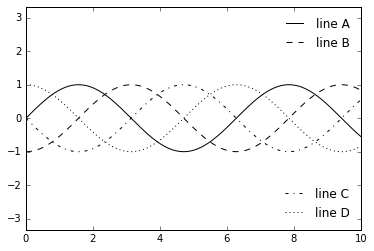

In [8]:
fig, ax = plt.subplots()
lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)
for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')
ax.axis('equal')
# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)
# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],loc='lower right', frameon=False)
ax.add_artist(leg);

## Customizing Colorbars
Plot legends identify discrete labels of discrete points. For continuous labels based on
the color of points, lines, or regions, a labeled colorbar can be a great tool. In Matplotlib,
a colorbar is a separate axes that can provide a key for the meaning of colors
in a plot.

The simplest colorbar can be
created with the<b> plt.colorbar</b> function

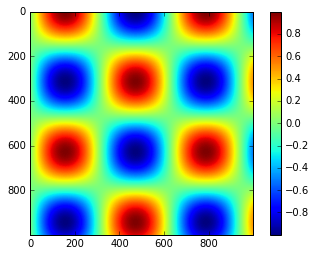

In [9]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])
plt.imshow(I)
plt.colorbar();

We’ll now discuss a few ideas for customizing these colorbars and using them effectively
in various situations.

### Customizing Colorbars
We can specify the colormap using the cmap argument to the plotting function that is
creating the visualization

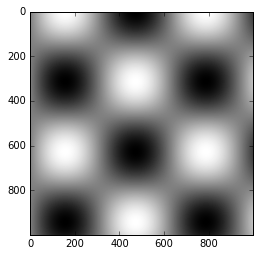

In [10]:
plt.imshow(I, cmap='gray');

All the available colormaps are in the <b>plt.cm</b> namespace; using IPython’s tabcompletion
feature will give you a full list of built-in possibilities:<b>
plt.cm.<TAB></b>

But being able to choose a colormap is just the first step: more important is how to
decide among the possibilities! The choice turns out to be much more subtle than you
might initially expect.

### Example: Handwritten Digits
For an example of where this might be useful, let’s look at an interesting visualization
of some handwritten digits data. This data is included in <b>Scikit-Learn</b>, and consists of
nearly 2,000 8×8 thumbnails showing various handwritten digits.

For now, let’s start by downloading the digits data and visualizing several of the example
images with<b> plt.imshow()</b>

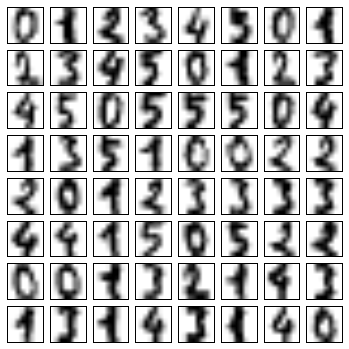

In [11]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

Because each digit is defined by the hue of its 64 pixels, we can consider each digit to
be a point lying in 64-dimensional space: each dimension represents the brightness of
one pixel. But visualizing relationships in such high-dimensional spaces can be
extremely difficult. One way to approach this is to use a <i>dimensionality reduction</i>
technique such as manifold learning to reduce the dimensionality of the data while
maintaining the relationships of interest. Dimensionality reduction is an example of
unsupervised machine learning,

Deferring the discussion of these details, let’s take a look at a two-dimensional manifold
learning projection of this digits data

In [12]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

We’ll use our discrete colormap to view the results, setting the <b>ticks</b> and<b> clim</b> to
improve the aesthetics of the resulting colorbar

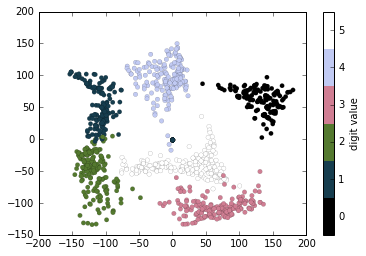

In [13]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

The projection also gives us some interesting insights on the relationships within the
dataset: for example, the ranges of 5 and 3 nearly overlap in this projection, indicating
that some handwritten fives and threes are difficult to distinguish, and therefore
more likely to be confused by an automated classification algorithm. Other values,
like 0 and 1, are more distantly separated, and therefore much less likely to be confused.
This observation agrees with our intuition, because 5 and 3 look much more
similar than do 0 and 1.